# 🧠 Reto 100a: Generador de Datos Sintéticos para Credit Scoring 🧠

## 🏆 Objetivo:

Desarrollar un generador de datos sintéticos realistas que simule solicitudes de tarjetas de crédito. Este conjunto de datos incluirá 1000 registros, con características financieras y demográficas de los solicitantes, introduciendo valores atípicos y datos faltantes para reflejar escenarios reales de evaluación crediticia.

## 📝 Requisitos:

1️⃣ Generar un archivo datos_credito.csv con al menos `1000 registros`.  
2️⃣ Incluir las siguientes columnas:  
🔸 `ID_Solicitante`: Identificador único (entero).  
🔸 `Edad`: Edad del solicitante (rango razonable).  
🔸 `Ingresos_Mensuales`: Ingresos mensuales del solicitante (distribución con valores extremos).  
🔸 `Deudas_Actuales`: Total de deudas actuales.  
🔸 `Historial_Crediticio_Meses`: Antigüedad en meses.  
🔸 `Numero_Creditos_Activos`: Cantidad de créditos activos.  
🔸 `Tipo_Empleo`: Categoría de empleo (Empleado, Independiente, Desempleado, Estudiante).  
🔸 `Region_Residencia`: Localización geográfica (Urbana, Rural, Suburbana).  
🔸 `Estado_Civil`: Estado civil (Soltero, Casado, Divorciado).  
🔸 `Mora_30_Dias_Ultimos_12_Meses`: Número de moras de 30 días en el último año.  
🔸 `Mora_60_Dias_Ultimos_12_Meses`: Número de moras de 60 días.  
🔸 `Mora_90_Dias_Ultimos_12_Meses`: Número de moras de 90 días.  
🔸 `Incumplimiento`: Variable objetivo (1 si incumple pagos, 0 si no).  
3️⃣ Introducir valores faltantes aleatoriamente en `Ingresos_Mensuales`, `Deudas_Actuales` y `Historial_Crediticio_Meses`.  
4️⃣ Guardar el archivo como `datos_credito.csv` para su posterior análisis.  

## 📌 Ejemplo de ejecución (fragmento de salida esperada):

✅ Archivo 'datos_credito.csv' generado con éxito.  

## 🔍 Pistas:
🔹 Usa `random` y `numpy` para generar distribuciones realistas.  
🔹 Asegura que el desequilibrio de clases refleje la realidad financiera (`90% sin incumplimientos`, `10% con incumplimientos`).  
🔹 Introduce valores faltantes estratégicamente para simular datos incompletos.  
🔹 Guarda el archivo en formato `.csv` con `pandas.to_csv()`.  

In [41]:
import pandas as pd
import numpy as np
import random

# 1️⃣ **Función para generar datos sintéticos**
def generar_datos_credito(n=1000):
    datos = []
    for i in range(n):
        edad = random.randint(18, 65)
        ingresos = max(1000, np.random.normal(5500, 2500))  # Distribución realista con valores extremos
        deudas = max(0, np.random.normal(1200, 800))
        historial_crediticio = random.randint(1, 180)
        num_creditos = random.randint(0, 7)
        tipo_empleo = random.choice(['Empleado', 'Independiente', 'Desempleado', 'Estudiante'])
        region = random.choice(['Urbana', 'Rural', 'Suburbana'])
        estado_civil = random.choice(['Soltero', 'Casado', 'Divorciado'])
        mora_30 = random.randint(0, 3)
        mora_60 = random.randint(0, 2)
        mora_90 = random.randint(0, 1)
        incumplimiento = 1 if random.random() < 0.1 else 0  # 90% cumplen, 10% no

        # Simulación de valores faltantes
        ingresos = None if random.random() < 0.05 else ingresos
        deudas = None if random.random() < 0.05 else deudas
        historial_crediticio = None if random.random() < 0.05 else historial_crediticio

        datos.append([i+1, edad, ingresos, deudas, historial_crediticio, num_creditos, tipo_empleo, region, estado_civil,
                      mora_30, mora_60, mora_90, incumplimiento])

    columnas = ["ID_Solicitante", "Edad", "Ingresos_Mensuales", "Deudas_Actuales", "Historial_Crediticio_Meses",
                "Numero_Creditos_Activos", "Tipo_Empleo", "Region_Residencia", "Estado_Civil", "Mora_30_Dias_Ultimos_12_Meses",
                "Mora_60_Dias_Ultimos_12_Meses", "Mora_90_Dias_Ultimos_12_Meses", "Incumplimiento"]

    df = pd.DataFrame(datos, columns=columnas)
    df.to_csv("datos_credito.csv", index=False)  # Guardando CSV
    print("✅ Archivo 'datos_credito.csv' generado con éxito.")
    
# 2️⃣ **Ejecutar la generación de datos**
generar_datos_credito(1000)


✅ Archivo 'datos_credito.csv' generado con éxito.


# 🧠 Reto 100b: Sistema de Credit Scoring Avanzado para Tarjetas de Crédito 🧠

## 🏆 Objetivo:

Desarrollar un sistema de Credit Scoring que evalúe la probabilidad de que un solicitante cumpla con sus pagos. Este sistema analizará datos financieros y demográficos, asignará una puntuación de riesgo y generará una decisión (Aprobado/Rechazado) basada en reglas de análisis crediticio. Además, realizará un Análisis Exploratorio de Datos (EDA) para entender la distribución de las variables.

## 📝 Requisitos:

1️⃣ Preprocesamiento de datos:  
🔸 Manejo de valores faltantes (imputación con `media`/`mediana`).  
🔸 Codificación de variables categóricas (`Tipo_Empleo`, `Region_Residencia`, `Estado_Civil`).  
🔸 Escalado de características numéricas (`MinMaxScaler`).  
🔸 Manejo de outliers en ingresos y deudas (`IQR`).  
2️⃣ Análisis Exploratorio de Datos (`EDA`):  
🔸 Estadísticas descriptivas (`describe()`).  
🔸 Distribución de variables categóricas (`value_counts()`).  
🔸 Correlación entre variables (`sns.heatmap()`).  
🔸 Visualización de la distribución de Incumplimiento.  
3️⃣ Desarrollo del modelo de scoring:  
🔸 Función `calcular_score()`, que asigna una puntuación basada en:  
🔸 Proporción `deuda`/`ingresos`.  
🔸 Moras y número de créditos activos.  
🔸 Umbral de decisión (Score > 0.7 → RECHAZADO).  
4️⃣ Generación de Reporte:  
🔸 Impresión de los primeros 10 registros con su score y decisión.  
🔸 Resumen de aprobaciones y rechazos.  
🔸 Exportación a un archivo Excel (`credit_scoring_resultados.xlsx`), con hojas separadas: `Resultados Generales`, `Aprobados` y `Rechazados`.  

## 📌 Ejemplo de ejecución (fragmento de salida esperada):

| 📌 **Primeros 10 registros analizados** |   |   |
|-------------------|------|-----------|
| ID_Solicitante   | Score | Decisión   |
| 1               | 0.98  | RECHAZADO  |
| 2               | 1.01  | RECHAZADO  |
| 3               | 0.99  | RECHAZADO  |
| 4               | 0.97  | RECHAZADO  |
| 5               | 1.56  | RECHAZADO  |
| 6               | 0.67  | APROBADO   |
| 7               | 1.41  | RECHAZADO  |
| 8               | 1.47  | RECHAZADO  |
| 9               | 0.54  | APROBADO   |
| 10              | 1.96  | RECHAZADO  |

📊 Resumen General:  
✔️ Aprobadas: 70  
❌ Rechazadas: 130  

📂 Archivo Excel generado sin problemas: credit_scoring_resultados.xlsx  

## 🔍 Pistas:
🔹 Usa `pandas` para manejar el DataFrame y realizar el preprocesamiento.  
🔹 Evita la repetición de datos en la salida y reportes.  
🔹 Codifica correctamente las variables categóricas (`Label Encoding`).  
🔹 Asegura que el Excel esté codificado en `UTF-8`, usando `openpyxl`.   
🔹 Usa visualizaciones (`seaborn` y `matplotlib`) para interpretar las tendencias en los datos.  


📊 Realizando Análisis Exploratorio de Datos...

📌 Estadísticas descriptivas de variables numéricas:
              Edad  Ingresos_Mensuales  Deudas_Actuales  \
count  1000.000000         1000.000000      1000.000000   
mean      0.504319            0.414410         0.376141   
std       0.289535            0.219846         0.223938   
min       0.000000            0.000000         0.000000   
25%       0.276596            0.262192         0.210110   
50%       0.510638            0.415185         0.375766   
75%       0.744681            0.557315         0.526066   
max       1.000000            1.000000         1.000000   

       Historial_Crediticio_Meses  Numero_Creditos_Activos  \
count                 1000.000000              1000.000000   
mean                     0.491542                 0.494000   
std                      0.282185                 0.324427   
min                      0.000000                 0.000000   
25%                      0.251397                 0.14285

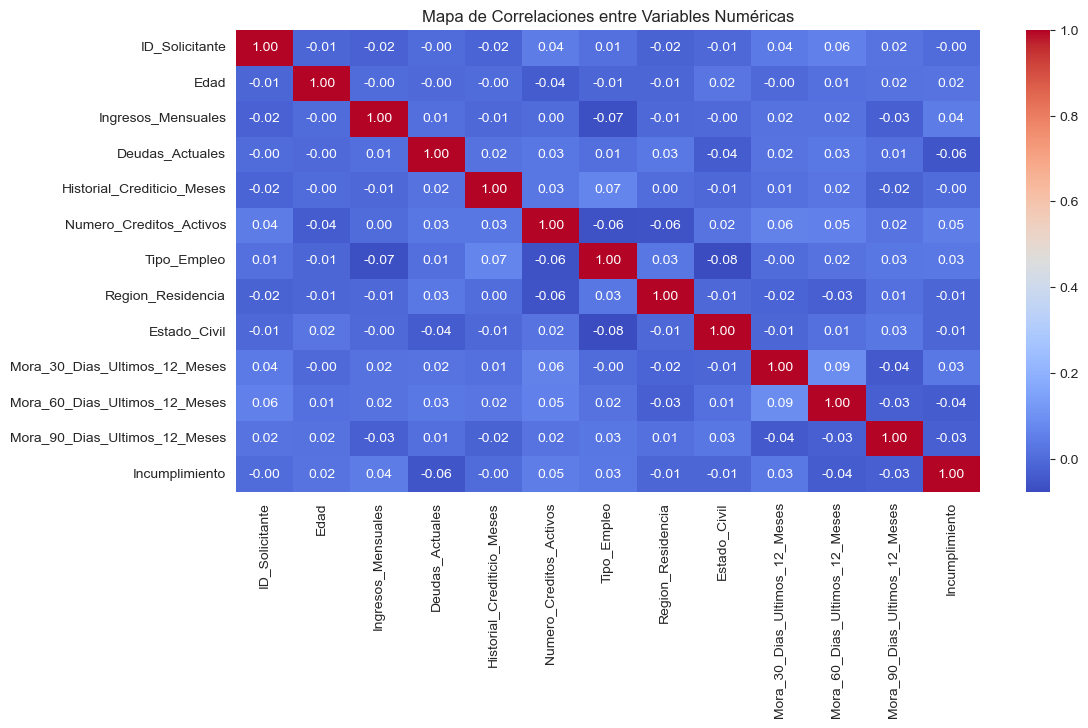


📌 Primeros 10 registros analizados:
   ID_Solicitante  Score   Decisión
0               1   0.98  RECHAZADO
1               2   1.01  RECHAZADO
2               3   0.99  RECHAZADO
3               4   0.97  RECHAZADO
4               5   1.56  RECHAZADO
5               6   0.67   APROBADO
6               7   1.41  RECHAZADO
7               8   1.47  RECHAZADO
8               9   0.54   APROBADO
9              10   1.96  RECHAZADO

📊 Resumen General:
✔️ Aprobadas: 186
❌ Rechazadas: 814
📂 Archivo Excel generado sin problemas: credit_scoring_resultados.xlsx


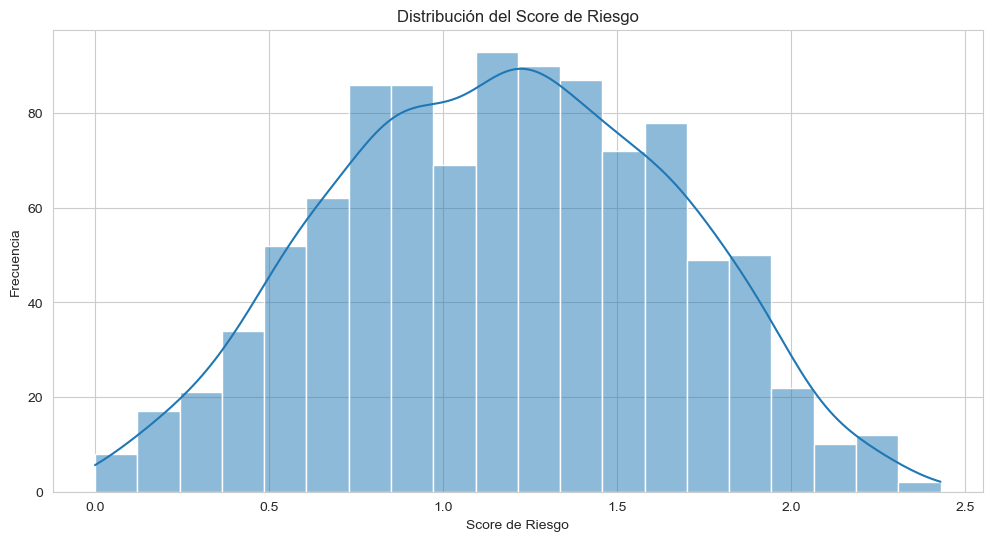

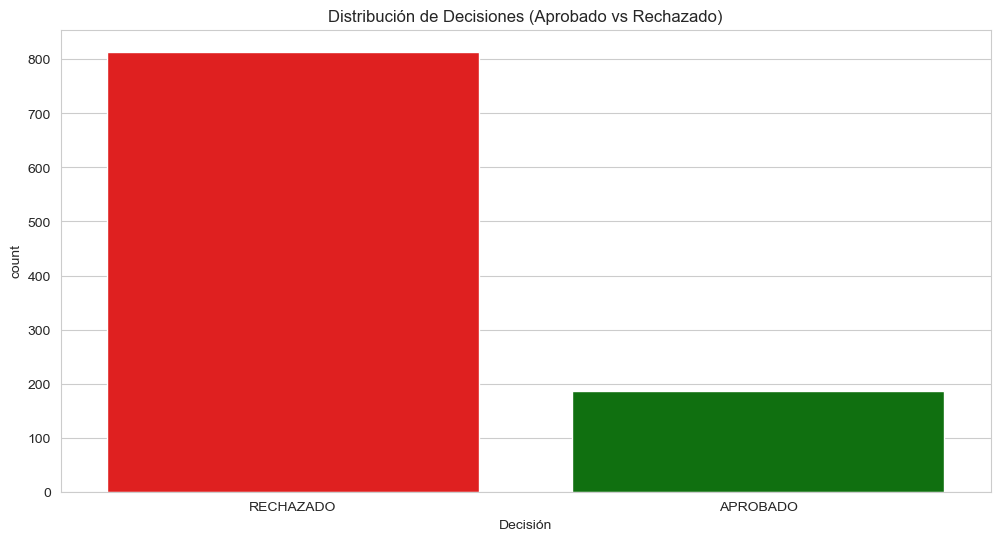

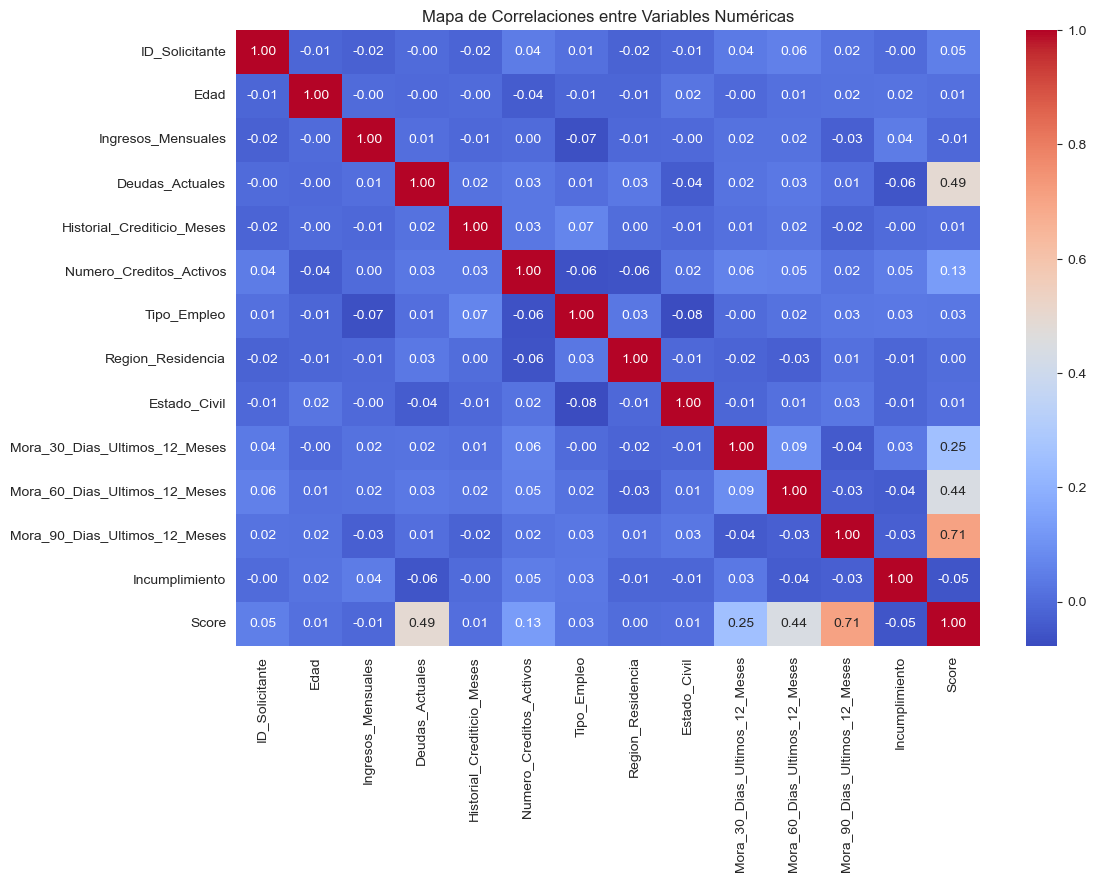

🏦 ¡Sistema de Credit Scoring finalizado!


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1️⃣ Cargar datos desde el archivo .csv
df = pd.read_csv("datos_credito.csv")

# 2️⃣ Manejo de valores faltantes
df.fillna({'Ingresos_Mensuales': df['Ingresos_Mensuales'].median(),
           'Deudas_Actuales': df['Deudas_Actuales'].median(),
           'Historial_Crediticio_Meses': df['Historial_Crediticio_Meses'].median()}, inplace=True)

# 3️⃣ Manejo de Outliers en ingresos y deudas (IQR)
for col in ["Ingresos_Mensuales", "Deudas_Actuales"]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lim_inf, lim_sup)

# 4️⃣ Codificación categórica
for col in ['Tipo_Empleo', 'Region_Residencia', 'Estado_Civil']:
    df[col] = df[col].astype('category').cat.codes

# 5️⃣ Escalado de datos numéricos
num_columns = ["Edad", "Ingresos_Mensuales", "Deudas_Actuales", "Historial_Crediticio_Meses",
               "Numero_Creditos_Activos", "Mora_30_Dias_Ultimos_12_Meses",
               "Mora_60_Dias_Ultimos_12_Meses", "Mora_90_Dias_Ultimos_12_Meses"]

scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

# 🔍 **Análisis Exploratorio de Datos (EDA)** 🔍
print("\n📊 Realizando Análisis Exploratorio de Datos...")

# Estadísticas descriptivas
print("\n📌 Estadísticas descriptivas de variables numéricas:")
print(df[num_columns].describe())

# Distribución de Categorías
print("\n📌 Distribución de Tipo_Empleo:")
print(df["Tipo_Empleo"].value_counts())

print("\n📌 Distribución de Estado_Civil:")
print(df["Estado_Civil"].value_counts())

print("\n📌 Distribución de Incumplimiento:")
print(df["Incumplimiento"].value_counts())

# Gráficos del EDA
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlaciones entre Variables Numéricas")
plt.show()

# 6️⃣ Función para calcular el score de riesgo
def calcular_score(solicitud):
    score = (solicitud["Deudas_Actuales"] / max(1, solicitud["Ingresos_Mensuales"])) + \
            (solicitud["Numero_Creditos_Activos"] * 0.1) + \
            (solicitud["Mora_30_Dias_Ultimos_12_Meses"] * 0.3) + \
            (solicitud["Mora_60_Dias_Ultimos_12_Meses"] * 0.5) + \
            (solicitud["Mora_90_Dias_Ultimos_12_Meses"] * 0.7)
    
    return round(score, 2)

# 7️⃣ Aplicación del scoring y toma de decisiones
df["Score"] = df.apply(calcular_score, axis=1)
df["Decisión"] = df["Score"].apply(lambda x: "RECHAZADO" if x > 0.7 else "APROBADO")

# 8️⃣ Mostrar los primeros 10 registros correctamente
print("\n📌 Primeros 10 registros analizados:")
print(df[["ID_Solicitante", "Score", "Decisión"]].head(10))

# 🔟 Generar **resumen general** de aprobaciones y rechazos
resumen = df["Decisión"].value_counts()
print("\n📊 Resumen General:")
print(f"✔️ Aprobadas: {resumen.get('APROBADO', 0)}")
print(f"❌ Rechazadas: {resumen.get('RECHAZADO', 0)}")

# 📂 Guardar resultados en Excel con codificación UTF-8
archivo_excel = "credit_scoring_resultados.xlsx"
with pd.ExcelWriter(archivo_excel, engine='openpyxl', mode='w') as writer:
    df.to_excel(writer, sheet_name="Resultados Generales", index=False)
    df[df["Decisión"] == "APROBADO"].to_excel(writer, sheet_name="Aprobados", index=False)
    df[df["Decisión"] == "RECHAZADO"].to_excel(writer, sheet_name="Rechazados", index=False)

print(f"📂 Archivo Excel generado sin problemas: {archivo_excel}")

# 📈 Generación de gráficos

# Histograma de Scores
plt.figure(figsize=(12, 6))
sns.histplot(df["Score"], bins=20, kde=True)
plt.title("Distribución del Score de Riesgo")
plt.xlabel("Score de Riesgo")
plt.ylabel("Frecuencia")
plt.show()

# Conteo de Aprobaciones vs Rechazos
plt.figure(figsize=(12, 6))
sns.countplot(x="Decisión", data=df, hue="Decisión", legend=False, palette={"APROBADO": "green", "RECHAZADO": "red"})
plt.title("Distribución de Decisiones (Aprobado vs Rechazado)")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["Decisión"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlaciones entre Variables Numéricas")
plt.show()

print("🏦 ¡Sistema de Credit Scoring finalizado!")
